In [60]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [149]:
iris_df = pd.read_csv("Iris.csv")
iris_df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Class']

In [150]:
iris_df.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [151]:
# Replace NaN (if any in the data) with Median

iris_df['Sepal Length'] = iris_df['Sepal Length'].fillna(iris_df['Sepal Length'].median())
iris_df['Sepal Width'] = iris_df['Sepal Width'].fillna(iris_df['Sepal Width'].median())
iris_df['Petal Length'] = iris_df['Petal Length'].fillna(iris_df['Petal Length'].median())
iris_df['Petal Width'] = iris_df['Petal Width'].fillna(iris_df['Petal Width'].median())

# Replace Zeroes (if any in the data) with Median

iris_df.loc[iris_df['Sepal Length'] == 0,'Sepal Length'] = iris_df.median()['Sepal Length']
iris_df.loc[iris_df['Sepal Width'] == 0,'Sepal Width'] = iris_df.median()['Sepal Width']
iris_df.loc[iris_df['Petal Length'] == 0,'Petal Length'] = iris_df.median()['Petal Length']
iris_df.loc[iris_df['Petal Width'] == 0,'Petal Width'] = iris_df.median()['Petal Width']

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [152]:
Convert_numeric = {"Class": {"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}}

iris_df.replace(Convert_numeric, inplace=True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [153]:
iris_df.corr()['Class']

Sepal Length    0.782561
Sepal Width    -0.419446
Petal Length    0.949043
Petal Width     0.956464
Class           1.000000
Name: Class, dtype: float64

From the above correlation values of all feature set columns with Class column it can be seen that no columns has correlation in the range 0f -0.1 to 0.1. Hence, not dropping any of the feature set columns.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [154]:
iris_df.var()

Sepal Length    0.685694
Sepal Width     0.188004
Petal Length    3.113179
Petal Width     0.582414
Class           0.671141
dtype: float64

From the above variances values it can be seen that none of the independent columns have a variance < 0.1. Hence not dropping any of those.

## Question 6

*Plot the scatter matrix for all the variables.*

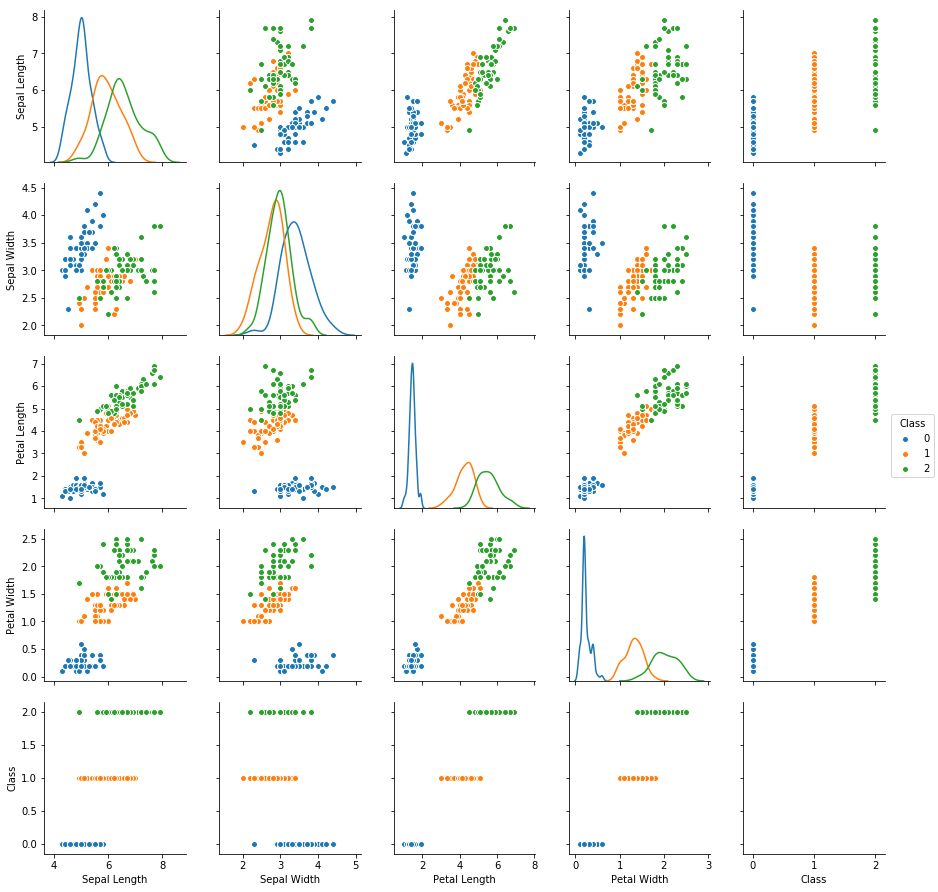

In [110]:
sns.pairplot(iris_df , hue='Class' , diag_kind = 'kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [155]:
X = iris_df.drop('Class', axis=1) 
Y = iris_df['Class']

#Splitting 

test_size = 0.20
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#Converting independent values into Z-scores

X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [156]:
# k = 3

NNH = KNeighborsClassifier(n_neighbors=3,weights = 'distance' )
NNH.fit(X_train_z, Y_train)
print(f'Accuracy with k = 3: {NNH.score(X_test_z, Y_test)}')

# k = 5

NNH = KNeighborsClassifier(n_neighbors=5,weights = 'distance' )
NNH.fit(X_train_z, Y_train)
print(f'Accuracy with k = 5: {NNH.score(X_test_z, Y_test)}')

# k = 9

NNH = KNeighborsClassifier(n_neighbors=9,weights = 'distance' )
NNH.fit(X_train_z, Y_train)
print(f'Accuracy with k = 9: {NNH.score(X_test_z, Y_test)}')

Accuracy with k = 3: 0.8333333333333334
Accuracy with k = 5: 0.8333333333333334
Accuracy with k = 9: 0.8


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [157]:
kList = list(range(1,20,2)) # list of k's to be tested

cv_scores = []
k_neighbors = []

# performing 10-fold cross validation

for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_z, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
MSE = [1 - x for x in cv_scores]
best_k = kList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 7


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

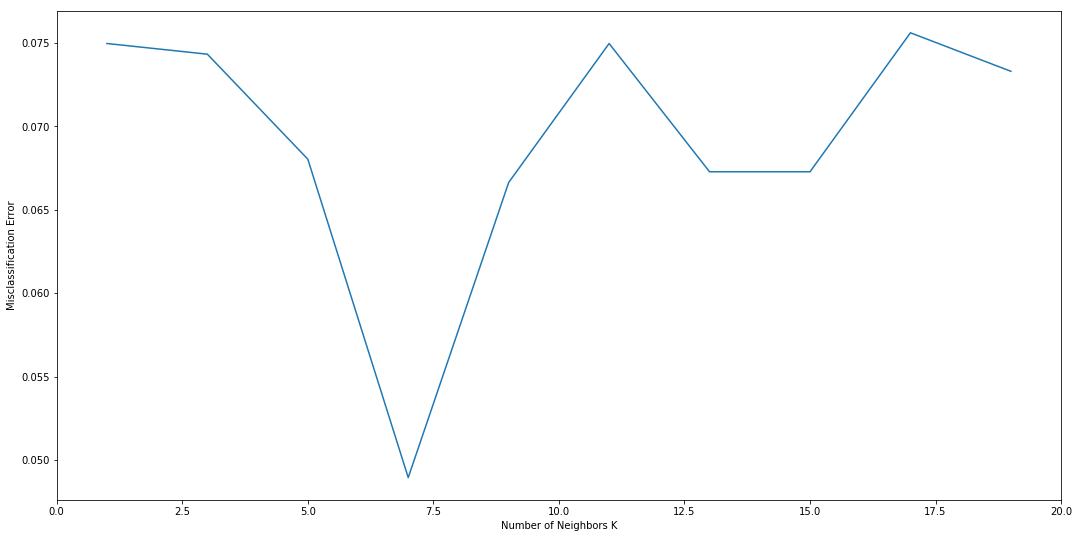

In [158]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,20)

plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [159]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [160]:
x = iris_df.drop('Class', axis=1) 
y = iris_df['Class']

In [161]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64
     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6     

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [162]:
iris_df.groupby(["Class"]).count()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


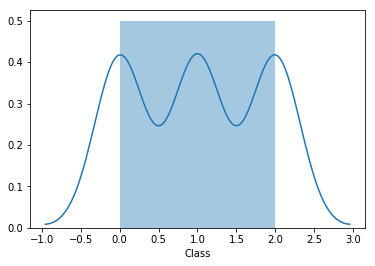

In [89]:
sns.distplot(y)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

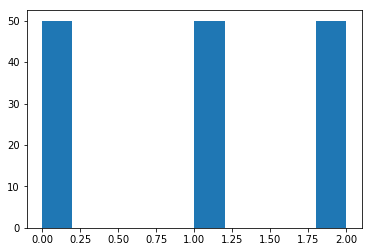

In [94]:
plt.hist(y)

### Question 12 
Find Correlation among all variables and give your insights 

In [1]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [163]:
iris_df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
Sepal Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal Width,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


1) Sepal Width has the lowest correlation with all of the columns among the features. It has almost 0 correlation with Sepal Length.

2) Petal Length and Petal Width have a very high positive correlation. Ideally one of these features can be removed from the model.

3) Petal Width has the highest correlation with the Class column

### Split data in Training and test set in 80:20.

In [164]:
test_size = 0.20
seed = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)

scaler.fit(x_test)
x_test_s = scaler.transform(x_test)


### Question 14 
Train and Fit NaiveBayes Model

In [166]:
#Fit the model
model = GaussianNB()
model.fit(x_train_s, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [167]:
#Predict
y_pred = model.predict(x_test_s)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [168]:
# show Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


In [169]:
# show accuracy
print(f'Accuracy of the NB Model: {model.score(x_train_s , y_train)}')

Accuracy of the NB Model: 0.95


In [ ]:
#Show precision and Recall metrics

In [170]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

   micro avg       0.90      0.90      0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [15]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779